# 분석

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#신림역-근처의-맛집-찾아보기" data-toc-modified-id="신림역-근처의-맛집-찾아보기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>신림역 근처의 맛집 찾아보기</a></span><ul class="toc-item"><li><span><a href="#카테고리-확인해보기" data-toc-modified-id="카테고리-확인해보기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>카테고리 확인해보기</a></span></li><li><span><a href="#신림역-근처의-괜찮은-음식점은?" data-toc-modified-id="신림역-근처의-괜찮은-음식점은?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>신림역 근처의 괜찮은 음식점은?</a></span><ul class="toc-item"><li><span><a href="#음식점의-분포-살펴보기" data-toc-modified-id="음식점의-분포-살펴보기-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>음식점의 분포 살펴보기</a></span></li><li><span><a href="#괜찮은-음식점의-기준을-몇-점으로-둬야할까" data-toc-modified-id="괜찮은-음식점의-기준을-몇-점으로-둬야할까-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>괜찮은 음식점의 기준을 몇 점으로 둬야할까</a></span></li></ul></li></ul></li><li><span><a href="#리뷰-분석해보기" data-toc-modified-id="리뷰-분석해보기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>리뷰 분석해보기</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#별점-추이-분석하기" data-toc-modified-id="별점-추이-분석하기-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>별점 추이 분석하기</a></span></li><li><span><a href="#서일순대국-리뷰-형태소-분석" data-toc-modified-id="서일순대국-리뷰-형태소-분석-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>서일순대국 리뷰 형태소 분석</a></span></li><li><span><a href="#월화고기-리뷰-형태소-분석" data-toc-modified-id="월화고기-리뷰-형태소-분석-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>월화고기 리뷰 형태소 분석</a></span></li></ul></li><li><span><a href="#그렇다면-신림역-최고의-맛집은?" data-toc-modified-id="그렇다면-신림역-최고의-맛집은?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>그렇다면 신림역 최고의 맛집은?</a></span></li></ul></li><li><span><a href="#신림역-주변-맛있는-일식집은-어디일까?" data-toc-modified-id="신림역-주변-맛있는-일식집은-어디일까?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>신림역 주변 맛있는 일식집은 어디일까?</a></span><ul class="toc-item"><li><span><a href="#일식집을-필터링해보자" data-toc-modified-id="일식집을-필터링해보자-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>일식집을 필터링해보자</a></span></li><li><span><a href="#JMS-확인하기" data-toc-modified-id="JMS-확인하기-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>JMS 확인하기</a></span></li></ul></li></ul></div>

In [224]:
# import os
# import random #데이터 샘플링
# from collections import Counter # count 용도

import numpy as np
import pandas as pd

# from geopy import distance # 거리 계산
# import geopy.distance
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

# 한글, 마이너스 깨짐 방지
from matplotlib import rc, font_manager, rcParams
font=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font)
rcParams['axes.unicode_minus'] = False

import folium # 지도 관련 시각화
from folium.plugins import HeatMap #지도 관련 시각화
from folium.plugins import MarkerCluster #지도 관련 시각화

## 데이터 불러오기

In [225]:
df = pd.read_csv('./source/restaurant_JMS.csv')
df.head()

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
0,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687,10.00
1,신림춘천집 본점,닭요리,신림동 1640-28,4.6,78,57,37.483578,126.928734,112.006133,9.71
2,정담은보쌈 신림점,"족발,보쌈",봉천동 959-4,4.3,54,123,37.485180,126.935330,510.913872,8.86
3,모스키친,"돈까스,우동",신대방동 344-15,4.2,56,101,37.497496,126.927648,1481.007286,8.68
4,서일순대국,순대,신대방동 377-1,3.4,118,175,37.498030,126.920730,1720.410904,8.61


In [226]:
for col in df.columns:
    print(f"column : {col}")
    print(f"The number of unique : {df[col].nunique()}")
    print()

column : name
The number of unique : 495

column : category
The number of unique : 82

column : address
The number of unique : 372

column : score
The number of unique : 42

column : eval_cnt
The number of unique : 47

column : review_cnt
The number of unique : 120

column : lat
The number of unique : 369

column : lng
The number of unique : 369

column : distance
The number of unique : 369

column : JMS
The number of unique : 344



In [227]:
df.shape

(495, 10)

+ 총 495곳의 음식점이 있다.

In [228]:
def aca_map(zoom=16, marker=True, circle=True, tile='OpenStreetMap'):
    aca_geo = (37.48425124769264, 126.92969929853001)
    m = folium.Map(aca_geo, zoom_start=zoom, tiles=tile)
    if marker:
        folium.Marker(aca_geo,  icon=folium.Icon(
            color='gray', icon='glyphicon glyphicon-flag')).add_to(m)
    if circle:
        folium.Circle(aca_geo, radius=700, color='',
              fill_color='gray', fill_opacity=.3).add_to(m)
    return m

In [230]:
m = aca_map(zoom=15, circle=False)
HeatMap(df[['lat', 'lng']], radius=14).add_to(m)
# MarkerCluster(df[['lat', 'lng']]).add_to(m)

m

+ 위 지도에서 보이는 것처럼, 신림역 부근의 음식점 데이터를 히트맵 형식으로 보여주고 있다.
+ 모든 음식점을 살펴보기 보다는 아래 두 가지 주제에 중점을 두고 분석해보고자 한다.
    - 신림역 근처에 어떤 맛집이 있는지
    - 사람들이 어떤 카테고리의 음식을 선호하는지

## 신림역 근처의 맛집 찾아보기

> 신림역에서 꼭 가봐야할 음식점은?

+ JMS 지표를 통해서 이제 어떤 음식점이 '괜찮은' 곳인지 알 수 있게 되었다.
    - Jhooooon Mat Score(이름하야 죤맛스코어!)
    - $JMS = scaler\_0\_to\_10(score * log(eval\_cnt+1) + log(review\_cnt+1))$

### 카테고리 확인해보기

+ 어떤 종류의 음식점이 있는지 확인해보자.

In [7]:
df.category.unique()

array(['육류,고기', '닭요리', '족발,보쌈', '돈까스,우동', '순대', '제과,베이커리', '갈비', '중화요리',
       '카페', '떡볶이', '초밥,롤', '분식', '디저트카페', '삼겹살', '국수', '양꼬치', '냉면',
       '참치회', '일식', '고기뷔페', '해물,생선', '감자탕', '곱창,막창', '해산물뷔페', '패밀리레스토랑',
       '커피전문점', '이탈리안', '일본식라면', '호프,요리주점', '술집', '찌개,전골', '중식', '베트남음식',
       '실내포장마차', '한식', '조개', '일본식주점', '샤브샤브', '치킨', '쌈밥', '삼계탕', '다방',
       '해장국', '햄버거', '아이스크림', '칵테일바', '회', '샐러드', '국밥', '패스트푸드', '동남아음식',
       '퓨전한식', '스테이크,립', '장어', '만화카페', '키즈카페', '굴,전복', '양식', '샌드위치',
       '테마카페', '보드카페', '일식집', '매운탕,해물탕', '게,대게', '피자', '뷔페', '오뎅바', '설렁탕',
       '닭강정', '와인바', '사철탕,영양탕', '도넛', '불고기,두루치기', '추어', '애견카페', '죽',
       '퓨전요리', '아구', '사주카페', '복어', '멕시칸,브라질', '곰탕'], dtype=object)

In [8]:
df.category.value_counts()

커피전문점      32
육류,고기      30
호프,요리주점    27
카페         17
치킨         17
           ..
쌈밥          1
동남아음식       1
닭강정         1
사주카페        1
패밀리레스토랑     1
Name: category, Length: 82, dtype: int64

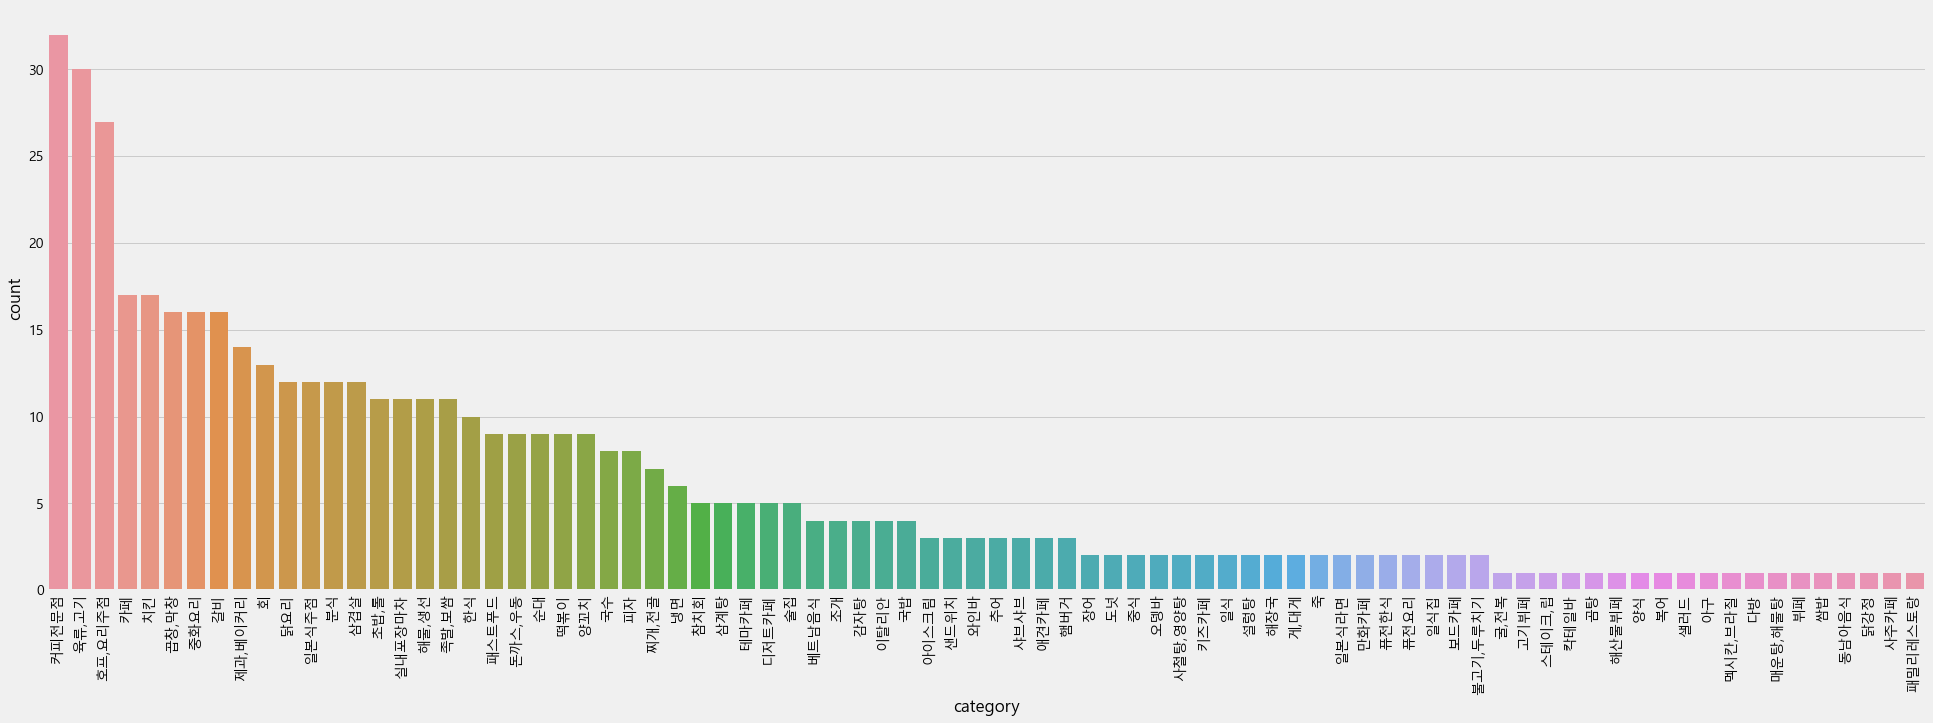

In [9]:
plt.figure(figsize=(30, 10))
sns.countplot(df.category, order=df.category.value_counts().index)
plt.xticks(rotation=90)
plt.show()

+ 커피전문점, 고기집, 주점이 가장 많다.
    - 신림역은 아무래도 식사 약속보다는 술 약속이 많은 장소.
    - 그래서 술을 같이 먹을 수 있는 음식점이 주를 이루고 있다.

In [10]:
df.query('category == "육류,고기"')

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
0,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687,10.00
23,우리축산정육식당,"육류,고기",신림동 1432-126,3.9,32,116,37.485048,126.928042,166.312093,7.39
32,서울집 신림직영점,"육류,고기",신림동 1430-12,4.6,14,96,37.487527,126.928070,387.852491,6.85
41,고앤고 본점,"육류,고기",봉천동 959-2,4.7,14,28,37.485070,126.935672,538.362232,6.47
48,고모네정육식당 신원시장점,"육류,고기",신림동 1602-1,3.6,22,80,37.481625,126.927937,331.054180,6.30
55,진1926 보라매점,"육류,고기",신대방동 395-73,4.7,12,21,37.491731,126.925153,919.505726,6.09
85,미가할매집,"육류,고기",신림동 1428-21,3.7,16,31,37.487668,126.928997,381.987537,5.61
88,왕주먹,"육류,고기",신림동 75-25,3.8,12,63,37.482471,126.931023,233.925677,5.59
93,옛날집,"육류,고기",신림동 1413-17,3.9,12,43,37.485333,126.932431,271.946587,5.54
96,부뚜막,"육류,고기",신림동 1433-74,3.2,12,218,37.484674,126.927515,193.923694,5.46


+ 오늘 짬뽕이 먹고싶으니까 중국집을 검색해보자!

In [11]:
df_ch = df.query('category=="중화요리"')
df_ch

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
7,중화요리팔공,중화요리,신림동 10-621,4.3,47,80,37.484043,126.937085,656.213449,8.46
13,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,45,37.487588,126.928260,388.576625,7.91
21,라공방 신림점,중화요리,신림동 1422-5,3.4,53,144,37.484722,126.930078,62.443638,7.45
99,홍콩반점0410 신림역점,중화요리,신림동 1639-1,3.9,14,17,37.483621,126.927056,240.366228,5.41
130,채린,중화요리,신림동 1429-4,4.5,10,5,37.489282,126.927051,602.531532,5.06
141,루비정,중화요리,신림동 10-661,3.8,9,32,37.483436,126.937699,716.026433,4.92
150,미가짬뽕,중화요리,신림동 1464-1,4.2,11,3,37.484549,126.924670,440.747567,4.75
152,홍콩반점0410 보라매공원점,중화요리,신대방동 395-69,3.5,11,20,37.491243,126.924082,917.789803,4.72
229,신룽푸마라탕,중화요리,신림동 1424-11,3.4,8,14,37.486071,126.929671,200.013420,4.09
240,영빈관,중화요리,신림동 1410-15,3.6,8,7,37.484952,126.933756,369.757131,4.01


+ 신림역에 이렇게 다양한 중국집들이 있었다.
+ 1점대에서 8점대까지 다양하게 분포되어 있다.
    - 좀 더 눈에 들어오는 비교할만한 수치를 찾아보자!

In [12]:
# JMS분포를 기준으로 특정 음식점이 몇%인지 알기 위한 그래프 그리기 함수 정의

# JMS의 분포 그리기
def dist_jms(df=df):
    plt.figure(figsize=(20, 5))
    plt.xlim(0, 10)
    sns.distplot(df['JMS'])
    plt.title('Distribution JMS', pad=40)
    plt.xlabel('')
    
# 분포에 음식점 추가하기
def add_res(name, df=df):
    index_ = df[df.name==name].index[0]
    jms_ = df.iloc[index_, 9]

    plt.axvline(x=jms_, color='r', ls='--')
    plt.text(jms_, 0.04, str(round((index_+1)/len(df)*100,2))+'%', rotation=20)
    plt.text(jms_-1, -0.001*len(name), name, rotation=-30)

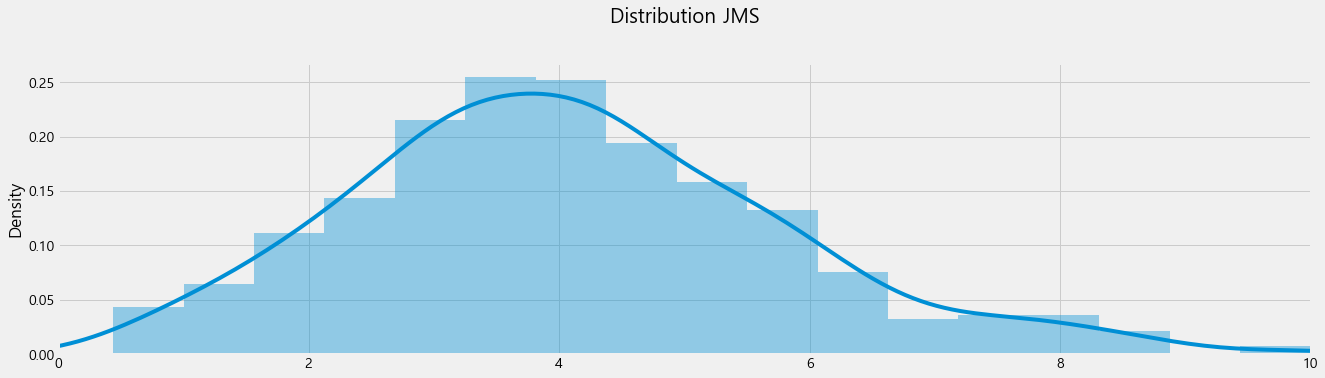

In [13]:
dist_jms()

+ JMS 점수가 오른쪽으로 긴 꼬리 분포를 그리고 있다.
+ 평균과 중앙값을 확인해보자.

In [14]:
print('평균: {:.2f}, 중앙값: {:.2f}'.format(df.JMS.mean(), df.JMS.median()))

평균: 4.07, 중앙값: 3.96


+ 평균은 약 4점이다.
+ JMS가 4점보다 높은 음식점은 '괜찮은' 음식점일 가능성이 높다.
+ 이제 중화요리 카테고리에서 4점보다 높은 곳은 어디인지 찾아보자.

In [15]:
# 평균 4점보다 높은 중국집
df_ch_good = df_ch.query('JMS > @df.JMS.mean()')
df_ch_good

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
7,중화요리팔공,중화요리,신림동 10-621,4.3,47,80,37.484043,126.937085,656.213449,8.46
13,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,45,37.487588,126.928260,388.576625,7.91
21,라공방 신림점,중화요리,신림동 1422-5,3.4,53,144,37.484722,126.930078,62.443638,7.45
99,홍콩반점0410 신림역점,중화요리,신림동 1639-1,3.9,14,17,37.483621,126.927056,240.366228,5.41
130,채린,중화요리,신림동 1429-4,4.5,10,5,37.489282,126.927051,602.531532,5.06
141,루비정,중화요리,신림동 10-661,3.8,9,32,37.483436,126.937699,716.026433,4.92
150,미가짬뽕,중화요리,신림동 1464-1,4.2,11,3,37.484549,126.924670,440.747567,4.75
152,홍콩반점0410 보라매공원점,중화요리,신대방동 395-69,3.5,11,20,37.491243,126.924082,917.789803,4.72
229,신룽푸마라탕,중화요리,신림동 1424-11,3.4,8,14,37.486071,126.929671,200.013420,4.09


+ 그럼 이 음식점들은 전체 식당들 중 몇 %일까
+ 상위 세 개의 음식점들이 몇 퍼센트 안에 속하는지 확인해보자

In [16]:
df_ch_good_7 = df_ch_good.query('JMS > 7')
df_ch_good_7

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
7,중화요리팔공,중화요리,신림동 10-621,4.3,47,80,37.484043,126.937085,656.213449,8.46
13,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,45,37.487588,126.928260,388.576625,7.91
21,라공방 신림점,중화요리,신림동 1422-5,3.4,53,144,37.484722,126.930078,62.443638,7.45


In [17]:
def add_res(name, df=df):
    index_ = df[df.name==name].index[0]
    jms_ = df.iloc[index_, 9]

    plt.axvline(x=jms_, color='r', ls='--')
    plt.text(jms_-0.1, 0.27, str(round((index_+1)/len(df)*100,2))+'%')
    plt.text(jms_-0.1, -0.05, name, rotation=-30)

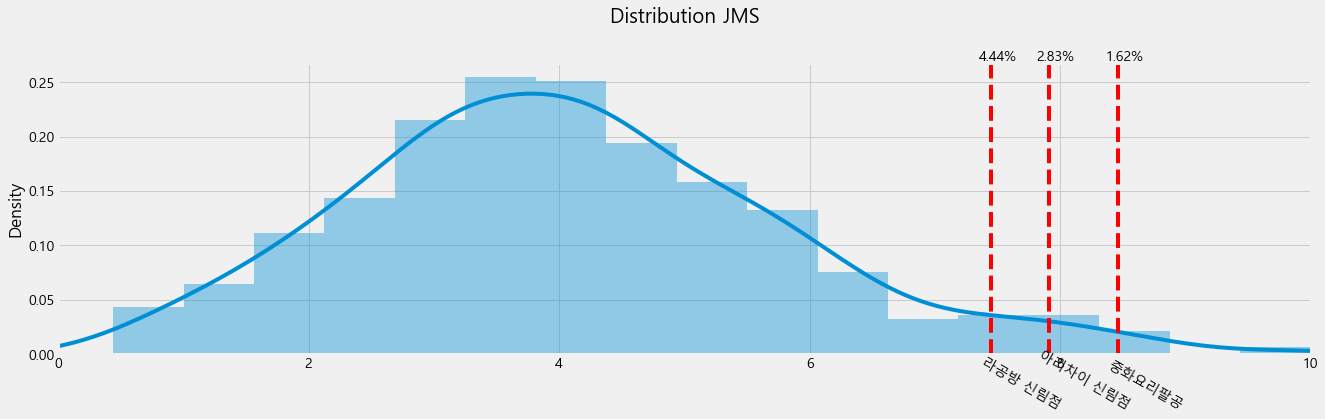

In [18]:
dist_jms()
for ch in df_ch_good_7.name:
    add_res(ch)

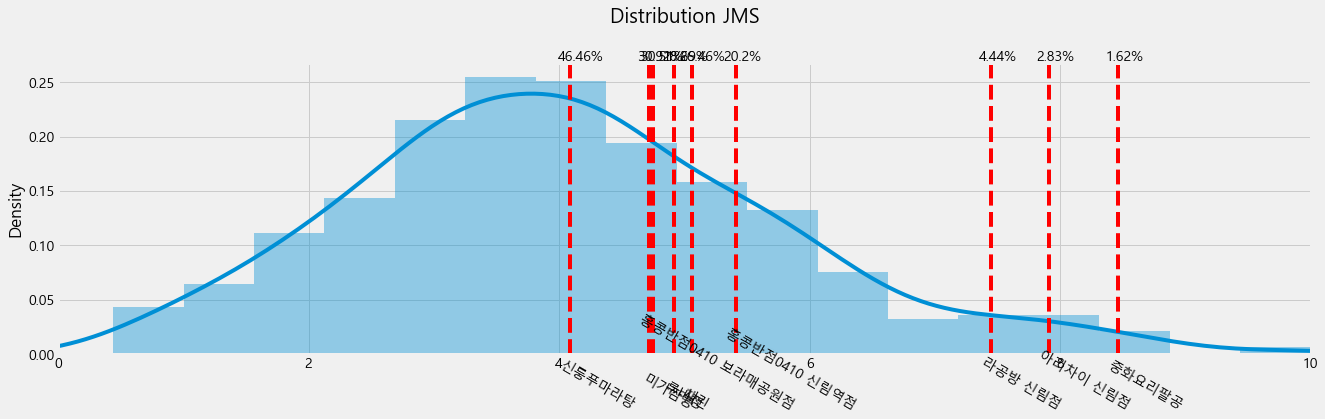

In [19]:
dist_jms()
for ch in df_ch_good.name:
    add_res(ch)

+ 7점대 이상의 음식점은 상위 5% 안에 있는 음식점이다.
+ 5점대는 20%
+ 4점대는 46%

In [20]:
# !pip install git+https://github.com/python-visualization/branca.git@master

In [21]:
m = aca_map()

for i in df_ch_good.index:
    lat = df_ch_good.loc[i, 'lat']
    lng = df_ch_good.loc[i, 'lng']
    name = df_ch_good.loc[i, 'name']
    folium.Marker([lat, lng], icon=folium.Icon(
            color='red', icon='heart-empty'), popup=name).add_to(m)
m

### 신림역 근처의 괜찮은 음식점은?

+ 그렇다면 신림역에서 꼭 가봐야할 음식점을 찾아보자.

#### 음식점의 분포 살펴보기

In [22]:
df_good = df.query('JMS > 4')
df_good

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
0,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687,10.00
1,신림춘천집 본점,닭요리,신림동 1640-28,4.6,78,57,37.483578,126.928734,112.006133,9.71
2,정담은보쌈 신림점,"족발,보쌈",봉천동 959-4,4.3,54,123,37.485180,126.935330,510.913872,8.86
3,모스키친,"돈까스,우동",신대방동 344-15,4.2,56,101,37.497496,126.927648,1481.007286,8.68
4,서일순대국,순대,신대방동 377-1,3.4,118,175,37.498030,126.920730,1720.410904,8.61
...,...,...,...,...,...,...,...,...,...,...
236,신림동피자집,피자,신림동 1638-3,3.8,5,24,37.482912,126.928762,170.504195,4.03
237,폴바셋 롯데백화점관악점,커피전문점,봉천동 729-22,4.2,5,11,37.490576,126.924991,812.656613,4.02
238,더불닭발,닭요리,신림동 1416-23,5.0,3,20,37.487732,126.930281,388.643137,4.01
239,타요키즈카페 보라매점,키즈카페,신대방동 395-69,3.7,6,15,37.491243,126.924082,917.789803,4.01


In [23]:
m = aca_map()
for i in df_good.index:
    lat, lng, name = df_good.lat[i], df_good.lng[i], df_good.name[i]
    folium.Marker([lat,lng], popup=name).add_to(m)
m

In [24]:
m = aca_map()
HeatMap(df_good[['lat', 'lng']], radius=20).add_to(m)
m

+ 음식점이 역 주변을 너머 신대방, 보라매까지 분포되어 있다.
+ 그렇지만 확실히 신림역 주변에 많이 분포되어 있다.

#### 괜찮은 음식점의 기준을 몇 점으로 둬야할까

In [25]:
# 4점 이상
df.query('JMS > 4')

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
0,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687,10.00
1,신림춘천집 본점,닭요리,신림동 1640-28,4.6,78,57,37.483578,126.928734,112.006133,9.71
2,정담은보쌈 신림점,"족발,보쌈",봉천동 959-4,4.3,54,123,37.485180,126.935330,510.913872,8.86
3,모스키친,"돈까스,우동",신대방동 344-15,4.2,56,101,37.497496,126.927648,1481.007286,8.68
4,서일순대국,순대,신대방동 377-1,3.4,118,175,37.498030,126.920730,1720.410904,8.61
...,...,...,...,...,...,...,...,...,...,...
236,신림동피자집,피자,신림동 1638-3,3.8,5,24,37.482912,126.928762,170.504195,4.03
237,폴바셋 롯데백화점관악점,커피전문점,봉천동 729-22,4.2,5,11,37.490576,126.924991,812.656613,4.02
238,더불닭발,닭요리,신림동 1416-23,5.0,3,20,37.487732,126.930281,388.643137,4.01
239,타요키즈카페 보라매점,키즈카페,신대방동 395-69,3.7,6,15,37.491243,126.924082,917.789803,4.01


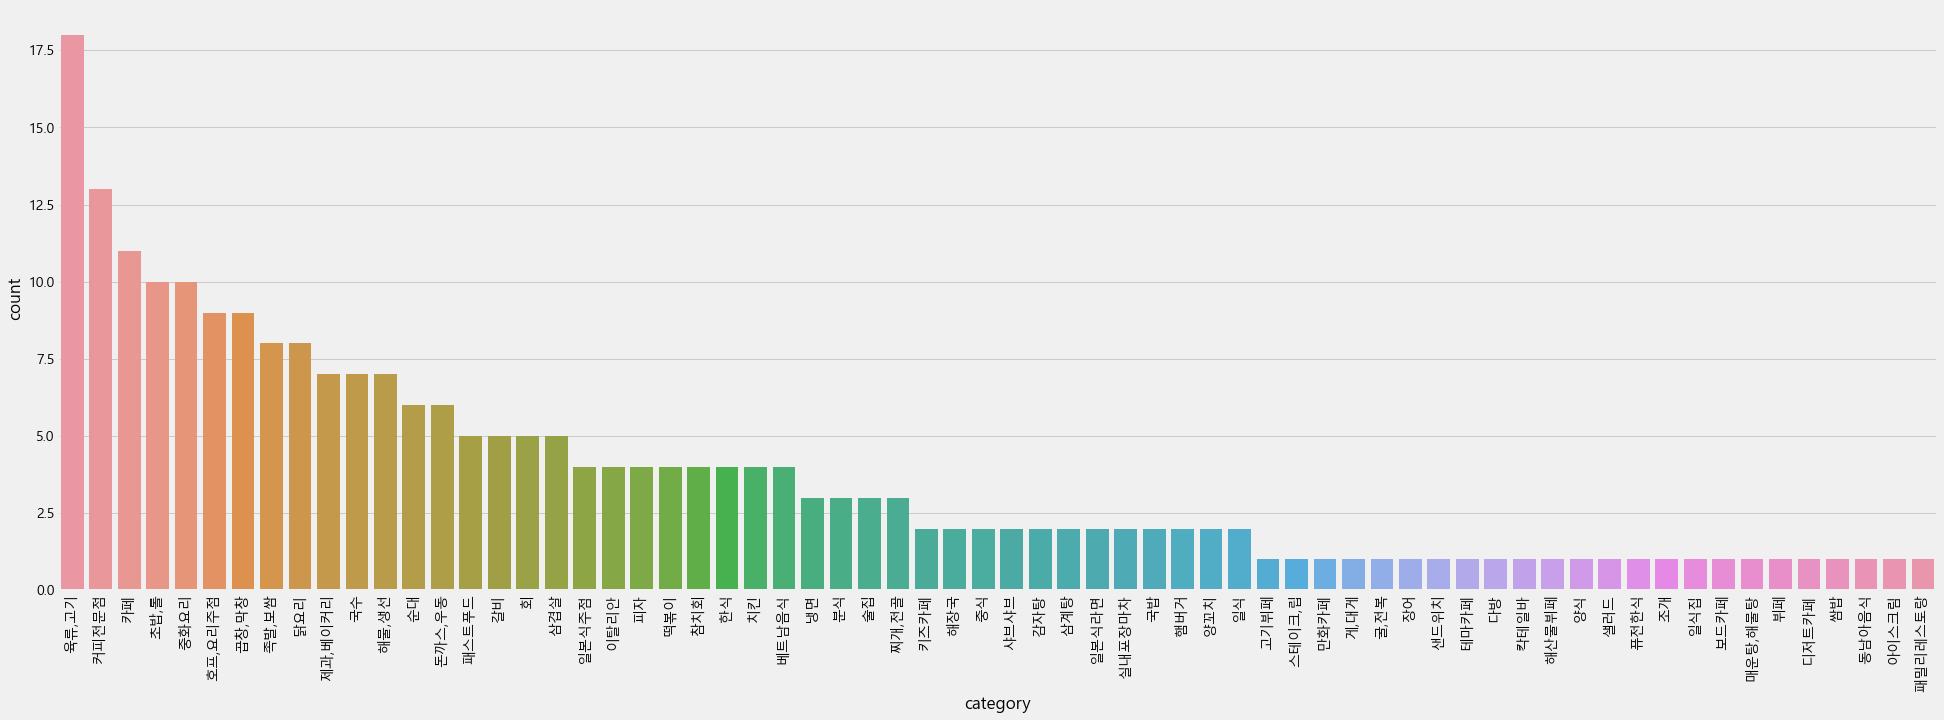

In [26]:
plt.figure(figsize=(30, 10))
sns.countplot(df.query('JMS > 4').category, order=df.query('JMS > 4').category.value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [27]:
# 5점 이상
df.query('JMS > 5')

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
0,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687,10.00
1,신림춘천집 본점,닭요리,신림동 1640-28,4.6,78,57,37.483578,126.928734,112.006133,9.71
2,정담은보쌈 신림점,"족발,보쌈",봉천동 959-4,4.3,54,123,37.485180,126.935330,510.913872,8.86
3,모스키친,"돈까스,우동",신대방동 344-15,4.2,56,101,37.497496,126.927648,1481.007286,8.68
4,서일순대국,순대,신대방동 377-1,3.4,118,175,37.498030,126.920730,1720.410904,8.61
...,...,...,...,...,...,...,...,...,...,...
129,대우뼈감자탕 신원시장점,감자탕,신림동 1587-22,4.8,8,7,37.482418,126.927335,290.447462,5.07
130,채린,중화요리,신림동 1429-4,4.5,10,5,37.489282,126.927051,602.531532,5.06
131,스시락,"초밥,롤",신림동 1424-11,3.6,12,27,37.486071,126.929671,200.013420,5.05
132,흥부보쌈,"족발,보쌈",신림동 1638-20,4.3,6,61,37.482683,126.929396,178.238784,5.02


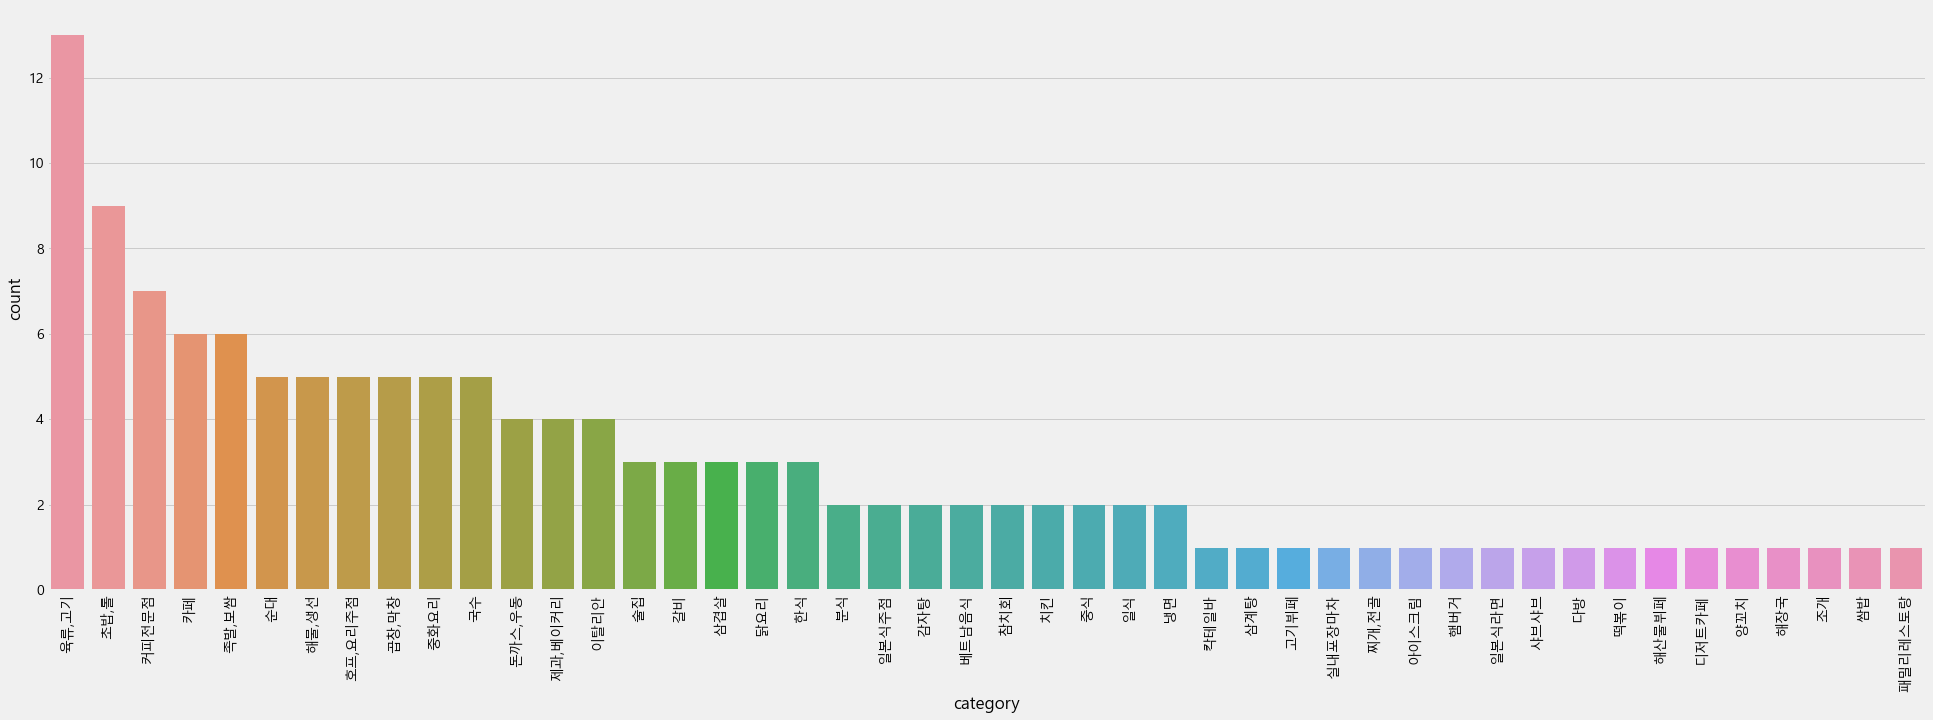

In [28]:
plt.figure(figsize=(30, 10))
sns.countplot(df.query('JMS > 5').category, order=df.query('JMS > 5').category.value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [29]:
df.JMS.quantile(.8)

5.412000000000001

In [30]:
# JMS 상위 20% 음식점들
df.query('JMS > 5.4')

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
0,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687,10.00
1,신림춘천집 본점,닭요리,신림동 1640-28,4.6,78,57,37.483578,126.928734,112.006133,9.71
2,정담은보쌈 신림점,"족발,보쌈",봉천동 959-4,4.3,54,123,37.485180,126.935330,510.913872,8.86
3,모스키친,"돈까스,우동",신대방동 344-15,4.2,56,101,37.497496,126.927648,1481.007286,8.68
4,서일순대국,순대,신대방동 377-1,3.4,118,175,37.498030,126.920730,1720.410904,8.61
...,...,...,...,...,...,...,...,...,...,...
95,포36거리 신림역점,베트남음식,신림동 84-23,4.4,8,54,37.482034,126.930649,264.016512,5.50
96,부뚜막,"육류,고기",신림동 1433-74,3.2,12,218,37.484674,126.927515,193.923694,5.46
97,할매보쌈,"족발,보쌈",신림동 1432-76,3.8,12,41,37.485605,126.929226,152.889014,5.42
98,스시나마,"초밥,롤",신림동 1641-9,3.1,23,37,37.483150,126.929980,128.085420,5.42


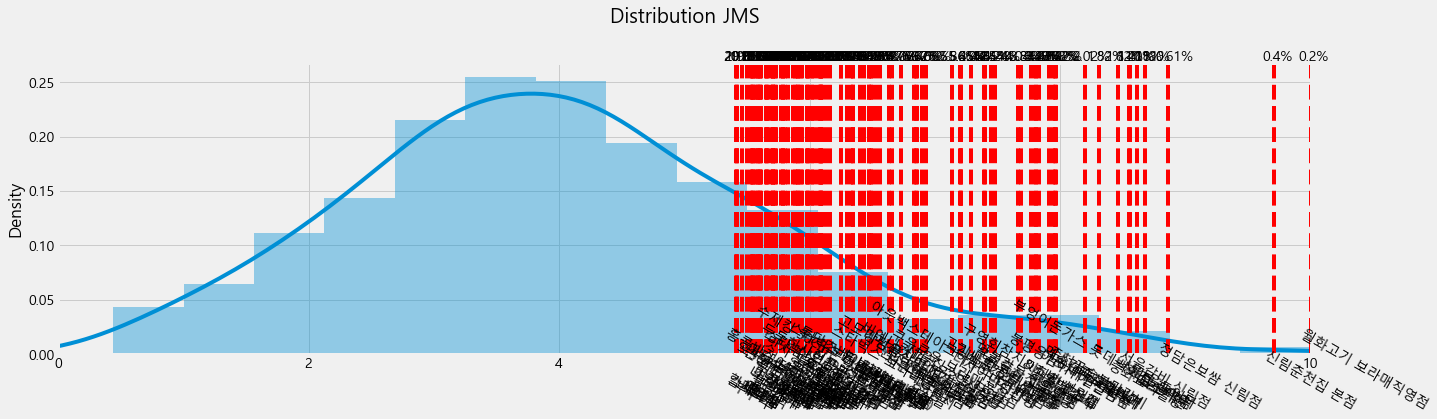

In [31]:
dist_jms()
for name in df.query('JMS > 5.4').name:
    add_res(name)

+ JMS 상위 20%안에는 100개의 음식점이 있다.
+ 상위 20% 이내의 음식점을 신림에서 한번쯤 가볼만한 100개의 음식점이라는 테마를 잡고 분석해보자.
+ 이제 상위 20% 안에 드는 100개의 음식점들의 위치를 파악해보자.

In [32]:
df_100 = df.query('JMS > 5.4')
df_100

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
0,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687,10.00
1,신림춘천집 본점,닭요리,신림동 1640-28,4.6,78,57,37.483578,126.928734,112.006133,9.71
2,정담은보쌈 신림점,"족발,보쌈",봉천동 959-4,4.3,54,123,37.485180,126.935330,510.913872,8.86
3,모스키친,"돈까스,우동",신대방동 344-15,4.2,56,101,37.497496,126.927648,1481.007286,8.68
4,서일순대국,순대,신대방동 377-1,3.4,118,175,37.498030,126.920730,1720.410904,8.61
...,...,...,...,...,...,...,...,...,...,...
95,포36거리 신림역점,베트남음식,신림동 84-23,4.4,8,54,37.482034,126.930649,264.016512,5.50
96,부뚜막,"육류,고기",신림동 1433-74,3.2,12,218,37.484674,126.927515,193.923694,5.46
97,할매보쌈,"족발,보쌈",신림동 1432-76,3.8,12,41,37.485605,126.929226,152.889014,5.42
98,스시나마,"초밥,롤",신림동 1641-9,3.1,23,37,37.483150,126.929980,128.085420,5.42


In [33]:
m = aca_map()
for i in df_100[:10].index:
    lat = df_100.loc[i, 'lat']
    lng = df_100.loc[i, 'lng']
    name = df_100.loc[i, 'name']
    folium.Marker([lat, lng], icon=folium.Icon(
            color='red', icon='heart-empty'), popup=name).add_to(m)

for i in df_100[10:].index:
    lat = df_100.loc[i, 'lat']
    lng = df_100.loc[i, 'lng']
    name = df_100.loc[i, 'name']
    folium.Marker([lat, lng], icon=folium.Icon(
            color='orange', icon='heart-empty'), popup=name).add_to(m)
m

+ 상위 10개의 음식점은 빨간색으로, 나머지는 주황색으로 마커를 표시했다.

## 리뷰 분석해보기

In [34]:
df_100.sort_values(by='eval_cnt', ascending=False)[:10]

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
4,서일순대국,순대,신대방동 377-1,3.4,118,175,37.498030,126.920730,1720.410904,8.61
0,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687,10.00
1,신림춘천집 본점,닭요리,신림동 1640-28,4.6,78,57,37.483578,126.928734,112.006133,9.71
13,아리차이 신림점,중화요리,신림동 1430-11,3.8,64,45,37.487588,126.928260,388.576625,7.91
20,만성찬팅,양꼬치,신림동 75-42,3.3,60,153,37.483033,126.930442,154.410076,7.48
34,쿠우쿠우 보라매공원점,해산물뷔페,신대방동 395-69,2.9,60,125,37.491243,126.924082,917.789803,6.73
3,모스키친,"돈까스,우동",신대방동 344-15,4.2,56,101,37.497496,126.927648,1481.007286,8.68
2,정담은보쌈 신림점,"족발,보쌈",봉천동 959-4,4.3,54,123,37.485180,126.935330,510.913872,8.86
21,라공방 신림점,중화요리,신림동 1422-5,3.4,53,144,37.484722,126.930078,62.443638,7.45
6,서울갈비 신림점,갈비,신림동 1410-17,4.2,48,137,37.484946,126.933579,354.399925,8.55


In [35]:
def crawler_for_review(review_num, url):
    from selenium import webdriver
    import time
    from bs4 import BeautifulSoup
    import pandas as pd
    
    def time_for_web(sleep=3):
        driver.implicitly_wait(10)
        time.sleep(sleep)
        
    driver = webdriver.Chrome('chromedriver/chromedriver.exe')
    time_for_web()
    # 리뷰 접속
    driver.get(url)
    time_for_web()
    
    temp = {'date': [], 'review': [], 'score': []}

    # 크롤링 시작
    for page in tqdm(range((review_num-1)//5+1)):
        time_for_web(sleep=2)
        soup = driver.page_source
        b = BeautifulSoup(soup, 'lxml')

        # 현재 페이지 정보 크롤링 - 레스토랑이 5개 미만이면 종료
        for i in range(5):
            try:
                temp['date'].append(pd.to_datetime(b.find_all(
                    'span', 'time_write')[i].text))    # 작성 날짜
                temp['review'].append(b.find_all('p', 'txt_comment')[i].text[:-3])    # 리뷰
                # 카카오플레이스에서 남긴 리뷰의 경우, 별점이 없음 > 0으로 대체
                try:
                    temp['score'].append(b.find_all('em', 'num_rate')[i+2].text[0])    # 평점
                except:
                    temp['score'].append(0)
                
            except:
                print('끝')
                break

        # 페이지 넘기기
        p = (page % 5)+1
        try:
            if page<5:
                if p // 5:
                    driver.find_element_by_css_selector(
                    '#mArticle > div.cont_evaluation > div.evaluation_review > div > a.btn_next').click()
                else:
                    driver.find_element_by_css_selector(
                        '#mArticle > div.cont_evaluation > div.evaluation_review \
                        > div > a:nth-child({})'.format(p+2)).click()
            elif p // 5:
                driver.find_element_by_css_selector(
                    '#mArticle > div.cont_evaluation > div.evaluation_review > div > a.btn_next').click()
            elif page:
                driver.find_element_by_css_selector(
                    '#mArticle > div.cont_evaluation > div.evaluation_review \
                    > div > a:nth-child({})'.format(p+3)).click()
        except:
            pass
    return pd.DataFrame(temp)

In [36]:
# review_gb = crawler_for_review(119, 'https://place.map.kakao.com/27454501#comment')

In [37]:
# review_gb.to_csv('./source/review_gb.csv', index=False)

In [38]:
review_gb = pd.read_csv('./source/review_gb.csv')
review_gb

,date,review,score
0,2021-09-09,"불친절, 순대도 너무 작게 주고, 1인분은 포장도 안해주고, 내장만 잔뜩 넣어주고 ...",1
1,2021-09-01,순대안에 시래기 들어있어서 독특하고 국물 시원한 편,3
2,2021-08-11,NaN,3
3,2021-08-03,NaN,5
4,2021-07-04,"평범한맛, 계산받으시는 여자분(사장님 이신가?) 상당히 불친절. 불친절할만큼 맛집...",1
...,...,...,...
114,2016-04-26,서울 서남권 5대 순대국으로 알려져 있음 가격7000원 보통 김치 깍뚜기 맜있음 ...,4
115,2016-04-09,NaN,3
116,2016-03-16,서울의 순대국 맛집 얘기 나올 때 자주 언급되는 집. 신동엽도 한번씩 들른다고 한다...,4
117,2016-03-12,NaN,3


In [39]:
# review_mon = crawler_for_review(104, 'https://place.map.kakao.com/768850911#comment')

In [40]:
# review_mon.to_csv('./source/review_mon.csv', index=False)

In [41]:
review_mon = pd.read_csv('./source/review_mon.csv')
review_mon

,date,review,score
0,2021-09-10,고기 좋긴 해요 구워먹는 치즈가 비싸서 맘아플뿐 아 총각김치맛있어요,5
1,2021-08-25,"목살, 삼겹살 무조건 먹어야함. 된장찌개? 최고존맛 레시피 알고싶음 무저건 먹어야함...",5
2,2021-08-25,고기 정말 좋아하는데 다른 곳에비해 고기품질이 좋고 맛있더라고요 다음에 재방문 예정...,5
3,2021-08-25,목살 너무 맛있어요 ㅠㅠ 자꾸 자꾸 생각나요,5
4,2021-08-25,근처에서 고깃집 찾다가 들렀는데 넘 맛있었어여ㅠㅠㅜ관자묵은지도 넘 맛있어서 자꾸 생...,5
...,...,...,...
99,2018-08-28,NaN,4
100,2018-06-01,엄청맛집이에요 회사 체육대회 끝나고 갔었는데 계속 생각나는맛,5
101,2018-04-15,이동네 삼겹살 먹으면 여기감. 고기질이 좋음. 가성비도 괘안음. 목살 요딴거 시키지...,5
102,2018-02-14,삼겹살 굿 김치말이국수도,4


+ 크롤링 완료!

#### 별점 추이 분석하기

+ 음식점의 별점이 어떻게 변화했는지 알아보자.
+ date컬럼의 형식을 변경해주기

In [71]:
review_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    119 non-null    object
 1   review  82 non-null     object
 2   score   119 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [72]:
review_mon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    104 non-null    object
 1   review  88 non-null     object
 2   score   104 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


In [75]:
review_gb.date = pd.to_datetime(review_gb['date'])
review_mon.date = pd.to_datetime(review_mon['date'])

In [76]:
review_gb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    119 non-null    datetime64[ns]
 1   review  82 non-null     object        
 2   score   119 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.9+ KB


In [84]:
review_gb.date.dt.year

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
114    2016
115    2016
116    2016
117    2016
118    2016
Name: date, Length: 119, dtype: int64

In [96]:
# 서일 순대국 연간 평가 수
review_gb.groupby(review_gb.date.dt.year).count()

,date,review,score
date,,,
2016,11,3,11
2017,7,2,7
2018,14,9,14
2019,14,13,14
2020,37,31,37
2021,36,24,36


In [90]:
review_mon.groupby(review_mon.date.dt.year).count()

,date,review,score
date,,,
2017,1,0,1
2018,6,5,6
2019,19,17,19
2020,37,32,37
2021,41,34,41


In [83]:
review_gb.isnull().sum()

date       0
review    37
score      0
dtype: int64

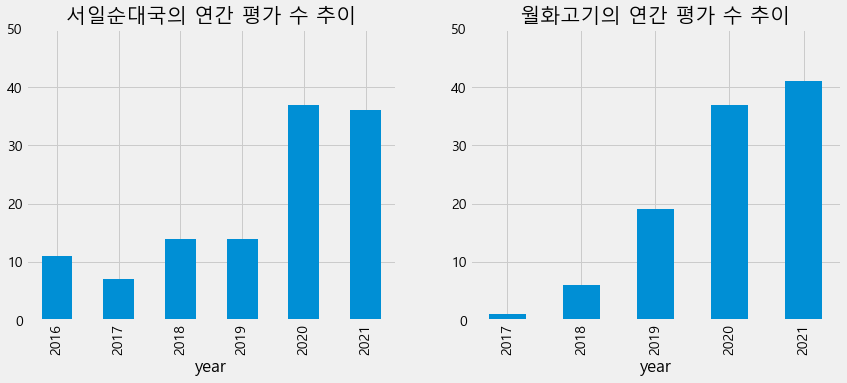

In [100]:
# 년도별 평가수 살펴보기
f, ax = plt.subplots(1, 2, figsize=(13, 5))
review_gb.groupby(review_gb.date.dt.year).count()['date'].plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('year')
ax[0].set_title('서일순대국의 연간 평가 수 추이')
ax[0].set_ylim(0, 50)

review_mon.groupby(review_mon.date.dt.year).count()['date'].plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('year')
ax[1].set_title('월화고기의 연간 평가 수 추이')
ax[1].set_ylim(0, 50)
plt.show()

+ 위 그래프를 통해 각 음식점이 언제 얼마나 평가를 받았는지 알 수 있다.
    - 평가는 서일순대국이 더 많이 받았다.
    - 두 음식점 다 20년부터 평가가 눈에 띄게 증가했다.
+ 서일순대국은 2020년부터 급작스럽게 평가가 늘었다.
    - 찾아보니 2019.03.27에 수요미식회에 방영됐었다.
+ 리뷰 수가 '좋은' 음식점을 나타낸다기보다 입소문 또는 인지도라고 이해하면 좋겠다.

+ 매해 평균 평점 살펴보기

In [87]:
# 서일순대국 매해 평균 평점 
review_gb.groupby(review_gb.date.dt.year).mean()

,score
date,
2016,3.727273
2017,3.428571
2018,3.214286
2019,3.000000
2020,3.594595
2021,3.388889


In [89]:
# 월화고기
review_mon.groupby(review_mon.date.dt.year).mean()

,score
date,
2017,4.000000
2018,4.500000
2019,4.000000
2020,4.324324
2021,4.073171


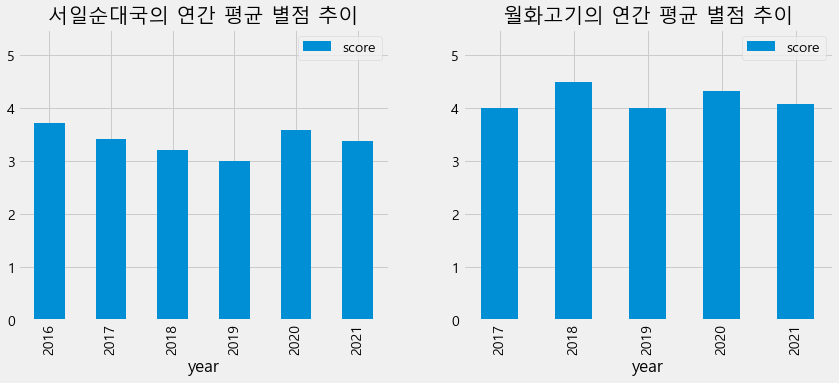

In [107]:
# 연도별 별점 살펴보기
f, ax = plt.subplots(1, 2, figsize=(13, 5))
review_gb.groupby(review_gb.date.dt.year).mean().plot(kind='bar', ax=ax[0])
ax[0].set_xlabel('year')
ax[0].set_title('서일순대국의 연간 평균 별점 추이')
ax[0].set_ylim(0, 5.5)

review_mon.groupby(review_mon.date.dt.year).mean().plot(kind='bar', ax=ax[1])
ax[1].set_xlabel('year')
ax[1].set_title('월화고기의 연간 평균 별점 추이')
ax[1].set_ylim(0, 5.5)

plt.show()

+ 연간 평균 별점의 추이를 한 눈에 볼 수 있다.
    - 서일순대국은 2016년 이후 계속 조금씩 하락하다가 2020년때 조금 회복했다.
    - 월화고기는 조금씩의 편차는 있지만 매년 4점대의 평균 별점을 유지하고 있다.

#### 서일순대국 리뷰 형태소 분석

In [108]:
from konlpy.tag import Okt
okt = Okt()

In [110]:
review_gb.review.dropna()

0      불친절, 순대도 너무 작게 주고, 1인분은 포장도 안해주고, 내장만 잔뜩 넣어주고 ...
1                           순대안에 시래기 들어있어서 독특하고 국물 시원한 편
4      평범한맛,  계산받으시는 여자분(사장님 이신가?) 상당히 불친절. 불친절할만큼 맛집...
5                                        맛있습니다. 잡내가 없어요.
7      다들 불친절하다는 평이 많아서 걱정했는데 실제로 불친절 하십니다.. 국밥 맛도 밍밍...
                             ...                        
101                        고기 누린내가 전혀 없고 국물이 기름지지 않고 담백함
104                                  먹고나면 든든하고 변함없는 맛입니다
108                                  맛있다~ 하지만 가격이 약간 그렇다
114    서울 서남권 5대 순대국으로 알려져 있음 가격7000원  보통 김치 깍뚜기 맜있음 ...
116    서울의 순대국 맛집 얘기 나올 때 자주 언급되는 집. 신동엽도 한번씩 들른다고 한다...
Name: review, Length: 82, dtype: object

In [112]:
sentences = []
for cp in tqdm(review_gb.review.dropna()):
    sentences.append(okt.pos(cp))

100%|██████████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 83.00it/s]


In [114]:
sentences[0]

[('불친절', 'Noun'),
 (',', 'Punctuation'),
 ('순대', 'Noun'),
 ('도', 'Josa'),
 ('너무', 'Adverb'),
 ('작게', 'Adjective'),
 ('주고', 'Verb'),
 (',', 'Punctuation'),
 ('1', 'Number'),
 ('인분', 'Noun'),
 ('은', 'Josa'),
 ('포장', 'Noun'),
 ('도', 'Josa'),
 ('안', 'VerbPrefix'),
 ('해주고', 'Verb'),
 (',', 'Punctuation'),
 ('내장', 'Noun'),
 ('만', 'Josa'),
 ('잔뜩', 'Noun'),
 ('넣어주고', 'Verb'),
 ('비싸게', 'Adjective'),
 ('팔고', 'Noun'),
 (',', 'Punctuation'),
 ('동네', 'Noun'),
 ('가게', 'Noun'),
 ('지만', 'Josa'),
 ('왜', 'Noun'),
 ('유명한지도', 'Adjective'),
 ('모르겠고', 'Verb')]

In [115]:
words = []
for sentence in tqdm(sentences):
    for word, tag in sentence:
        if tag not in ['Josa', 'Punctuation']:
            words.append(word)

100%|███████████████████████████████████████████████████████████████████████████████| 82/82 [00:00<00:00, 82418.63it/s]


In [131]:
from wordcloud import WordCloud
def makeWordcloud(words, cmap='RdBu', title=None):
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/Malgun.ttf', background_color='white',
                          width=1500, colormap=cmap, height=1000).generate_from_frequencies(words)
    plt.figure(figsize=(15, 8))
    plt.title(title)
    plt.imshow(wordcloud)

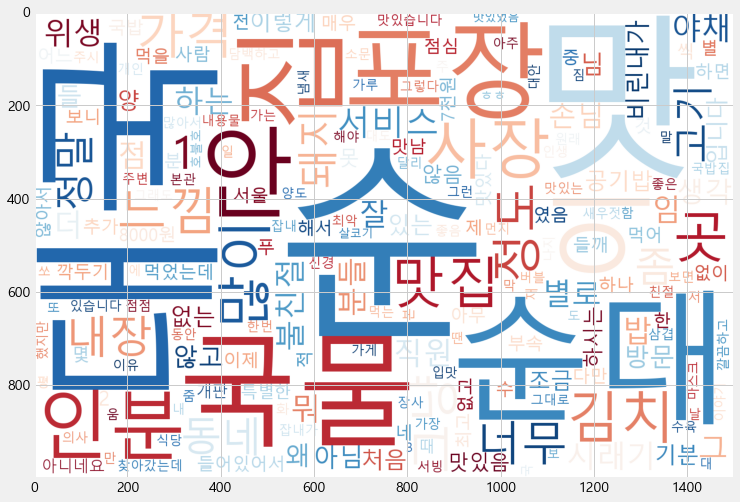

In [132]:
from collections import Counter
countword = Counter(words)
makeWordcloud(countword)

+ 중간중간 '불친절', '비린내' 등 부정적인 단어들이 보인다.
+ 긍정 / 부정으로 나누어 시각화를 해보자

In [137]:
len(review_gb[review_gb.score>3])

67

In [144]:
len(review_gb[review_gb.score<=3])

52

In [147]:
review_gb[review_gb['score']<3].dropna()['review']

0     불친절, 순대도 너무 작게 주고, 1인분은 포장도 안해주고, 내장만 잔뜩 넣어주고 ...
4     평범한맛,  계산받으시는 여자분(사장님 이신가?) 상당히 불친절. 불친절할만큼 맛집...
7     다들 불친절하다는 평이 많아서 걱정했는데 실제로 불친절 하십니다.. 국밥 맛도 밍밍...
9     유튜브 보고 찾아갔는데 먼지막에서 지난 주에 먹고(공기 따로 6,000원) (내장을...
10                                      비위생적이고 맛도 평범합니다
11    위생 최악... 공기밥 재활용해요 고추가루있는 한술 뜬 먹던 밥 줘서 바꿔달라니까 ...
15    유명하다고해서 가봤는데 맛있는건지 모르겠어요. 사장님인지 직원인지 불친절해서 불편했...
16    포장하면 공기밥 '원래' 안주는곳 ㅋㅋㅋㅋㅋㅋ집에 밥없는사람은 국만 먹어야하는곳 포...
18    이렇게 느끼한 국물은 간만에 먹었네여 밑에 평을보믄 전엔 맛있었는지 모르겠지만 소문...
30    본관 주인때문에 기분 잡쳐서 그냥 나와버렸네요. 설 연휴 마지막날(14일)에 점심 ...
45                                        가게 직원이 불친절합니다
47                                포장하면 공깃밥 안줌. 천원 추가해야함
49    맛이야 뭐 괜찮은데 일하시는 분들 친절이 아주 밑바닥입니다.  사장님 정말 직원 교...
55                                    거품 너무 많이 낀 집 버블버블
58                                  7천원에 팔아라 ..가격대비 별로임
59                          왜 유명한지 절대 모르겠는집..동네 국밥집 가세요
71             중학교때부터 다녔는데 점점 순대에 야채만 넣음. 위생이 별로라 이제 안감
73                    호불호가 갈리는 순대 같내요 저는 순대가 너무 

100%|███████████████████████████████████████████████████████████████████████████████| 54/54 [00:00<00:00, 27069.73it/s]


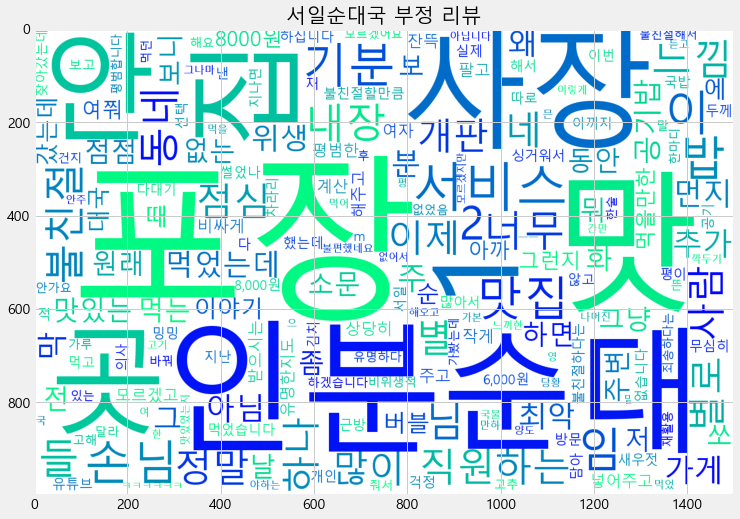

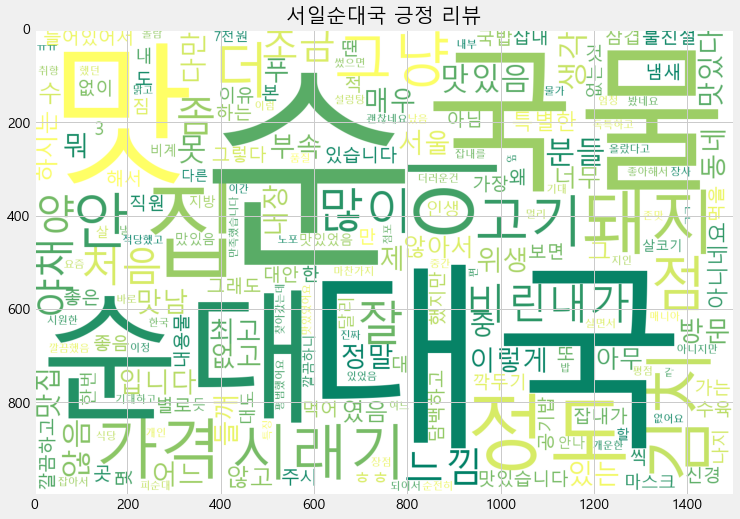

In [151]:
def makeWords(dataframe):
    sentences = []
    words = []
    for cp in tqdm(dataframe['review']):
        sentences.append(okt.pos(cp))
    for sentence in tqdm(sentences):
        for word, tag in sentence:
            if tag not in ['Josa', 'Punctuation']:
                words.append(word)
    return words

# 부정 리뷰
words_bad = makeWords(review_gb[review_gb['score']<3].dropna())
countword_bad = Counter(words_bad)
makeWordcloud(countword_bad, cmap='winter', title='서일순대국 부정 리뷰')

# 긍정 리뷰
words_good = makeWords(review_gb[review_gb['score']>=3].dropna())
countword_good = Counter(words_good)
makeWordcloud(countword_good, cmap='summer', title='서일순대국 긍정 리뷰')

+ 부정적 리뷰에서 불친절에 계속 눈에 띈다.
+ 부정적 리뷰를 직접 살펴보자.

In [156]:
review_gb[review_gb['score']<3].dropna()

,date,review,score
0,2021-09-09,"불친절, 순대도 너무 작게 주고, 1인분은 포장도 안해주고, 내장만 잔뜩 넣어주고 ...",1
4,2021-07-04,"평범한맛, 계산받으시는 여자분(사장님 이신가?) 상당히 불친절. 불친절할만큼 맛집...",1
7,2021-06-09,다들 불친절하다는 평이 많아서 걱정했는데 실제로 불친절 하십니다.. 국밥 맛도 밍밍...,1
9,2021-06-02,"유튜브 보고 찾아갔는데 먼지막에서 지난 주에 먹고(공기 따로 6,000원) (내장을...",1
10,2021-05-29,비위생적이고 맛도 평범합니다,1
11,2021-05-28,위생 최악... 공기밥 재활용해요 고추가루있는 한술 뜬 먹던 밥 줘서 바꿔달라니까 ...,1
15,2021-04-27,유명하다고해서 가봤는데 맛있는건지 모르겠어요. 사장님인지 직원인지 불친절해서 불편했...,1
16,2021-04-27,포장하면 공기밥 '원래' 안주는곳 ㅋㅋㅋㅋㅋㅋ집에 밥없는사람은 국만 먹어야하는곳 포...,1
18,2021-04-23,이렇게 느끼한 국물은 간만에 먹었네여 밑에 평을보믄 전엔 맛있었는지 모르겠지만 소문...,1
30,2021-02-16,본관 주인때문에 기분 잡쳐서 그냥 나와버렸네요. 설 연휴 마지막날(14일)에 점심 ...,1


+ 리뷰 전반적으로 불친절에 대한 얘기가 많다.

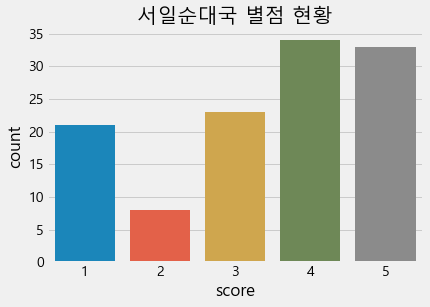

In [162]:
sns.countplot(review_gb.score)
plt.title('서일순대국 별점 현황')
plt.show()

+ 평점이 제일 높았던 2016년과 제일 낮았던 2019년의 별점 분포를 확인해보자.

Text(0.5, 1.0, '2019년 서일순대국 별점 집계')

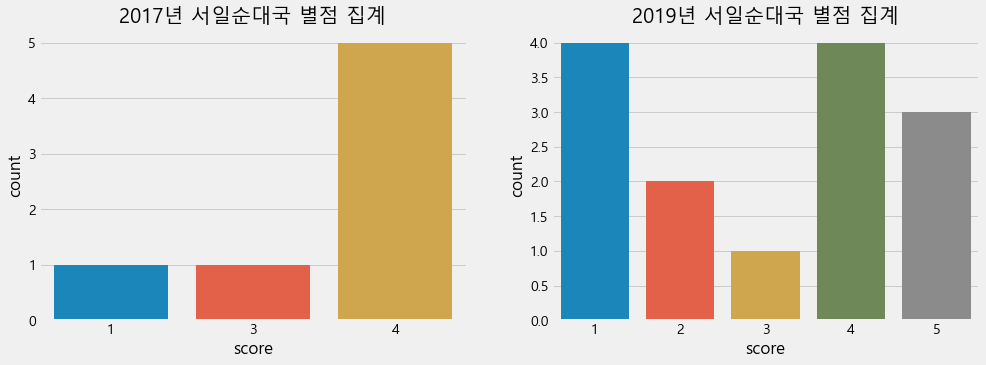

In [186]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(review_gb[review_gb.date.dt.year==2017].score, ax=ax[0])
ax[0].set_title('2017년 서일순대국 별점 집계')
sns.countplot(review_gb[review_gb.date.dt.year==2019].score, ax=ax[1])
ax[1].set_title('2019년 서일순대국 별점 집계')

+ 방송 이후 인지도는 높아졌지만, 그 높아진 만큼의 인지도를 감당하지는 못했던 것 같다.

#### 월화고기 리뷰 형태소 분석

In [157]:
review_mon.isnull().sum()

date       0
review    16
score      0
dtype: int64

100%|██████████████████████████████████████████████████████████████████████████████████████████| 88/88 [00:00<?, ?it/s]


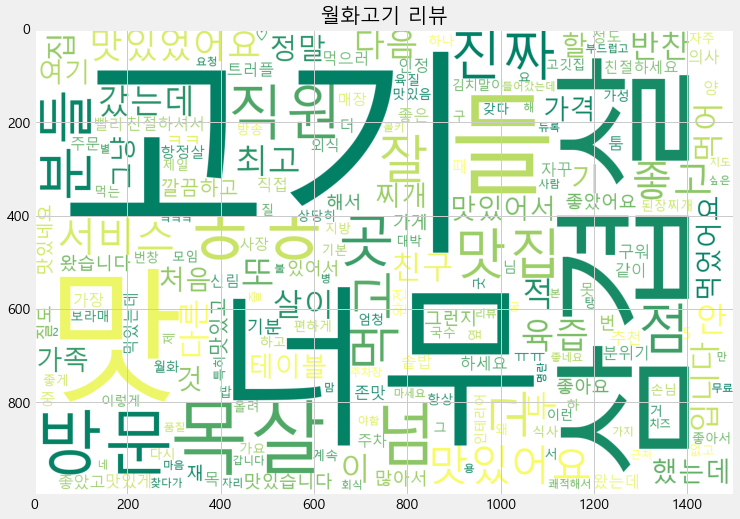

In [159]:
words_mon = makeWords(review_mon.dropna())
countword_mon = Counter(words_mon)
makeWordcloud(countword_mon, cmap='summer', title='월화고기 리뷰')

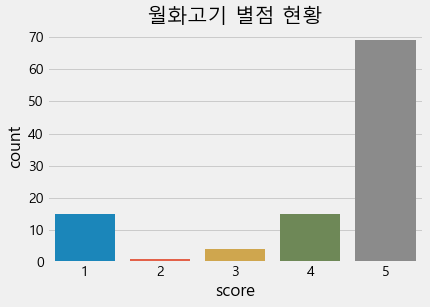

In [187]:
sns.countplot(review_mon.score)
plt.title('월화고기 별점 현황')
plt.show()

+ 역시 맛집답게 5점이 압도적으로 높다!
+ 근데 부정적인 리뷰가 너무 궁금하다
    - 직접 확인해보자!

In [188]:
review_mon[review_mon.score<3]

,date,review,score
5,2021-08-24,리뷰 주작이라는게 뭔지 보여준 집,1
11,2021-07-02,밥 평범한 거구요ㅋㅋㅋㅋㅋ서비스 진짜 최악입니다 가지마세요,1
17,2021-05-25,사람 많아서 그런지 서비스가 정말 엉망이었어요 다른 테이블처럼 구워주는 줄 알았는데...,1
26,2021-04-14,별점조작 싫어요,1
27,2021-04-14,여기 평점 조작하네 쪼코남무숲 핑크빛내맘에 설하 도현 같은 곳 5점씩 ㅎㅎ,1
32,2021-04-10,"동네주민이라 자주가던 곳인데, 최근에 갔더니 테이블 관리가 전혀 안됩니다. 월화...",1
38,2021-01-27,므여 ~~ 가볼려뜨만 방송 믿지말라긍 그럼 방송 사고잉겨 ~~ 끙 비빔 냉면도 주...,1
39,2021-01-26,솥밥에 트러플은 무슨ㅋㅋㅋ 방송 믿지마세요,1
45,2020-11-10,NaN,1
48,2020-10-30,뼈목살 맛있게 먹었어요. 손님이 많아서인지 서비스가 좋지는 않네요. 냉면 주문했는...,2


+ 고객이 몰리는 시간대에는 제대로 된 케어가 안되는듯하다.

### 그렇다면 신림역 최고의 맛집은?

+ 딱 한 곳만 갈 수 있다면 어디를 가야할까?

In [194]:
df_good.iloc[0]

name          월화고기 보라매직영점
category            육류,고기
address         봉천동 732-3
score                 4.2
eval_cnt              103
review_cnt            215
lat             37.491585
lng            126.926289
distance       865.557687
JMS                  10.0
Name: 0, dtype: object

In [198]:
m = aca_map(zoom=15)
folium.Marker([df_good.iloc[0].lat, df_good.iloc[0].lng], icon=folium.Icon(
        color='red', icon='heart-empty'), popup=df_good.iloc[0].name).add_to(m)
m

한 가지 단점이 있다면 신림역에서 살짝 걸어야 한다는 점.

In [201]:
# df_100.to_csv('./source/res_100.csv', index=False)

## 신림역 주변 맛있는 일식집은 어디일까?

+ 초밥이 먹고싶다!

### 일식집을 필터링해보자

In [203]:
df_100

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
0,월화고기 보라매직영점,"육류,고기",봉천동 732-3,4.2,103,215,37.491585,126.926289,865.557687,10.00
1,신림춘천집 본점,닭요리,신림동 1640-28,4.6,78,57,37.483578,126.928734,112.006133,9.71
2,정담은보쌈 신림점,"족발,보쌈",봉천동 959-4,4.3,54,123,37.485180,126.935330,510.913872,8.86
3,모스키친,"돈까스,우동",신대방동 344-15,4.2,56,101,37.497496,126.927648,1481.007286,8.68
4,서일순대국,순대,신대방동 377-1,3.4,118,175,37.498030,126.920730,1720.410904,8.61
...,...,...,...,...,...,...,...,...,...,...
95,포36거리 신림역점,베트남음식,신림동 84-23,4.4,8,54,37.482034,126.930649,264.016512,5.50
96,부뚜막,"육류,고기",신림동 1433-74,3.2,12,218,37.484674,126.927515,193.923694,5.46
97,할매보쌈,"족발,보쌈",신림동 1432-76,3.8,12,41,37.485605,126.929226,152.889014,5.42
98,스시나마,"초밥,롤",신림동 1641-9,3.1,23,37,37.483150,126.929980,128.085420,5.42


In [213]:
df.category.unique()

array(['육류,고기', '닭요리', '족발,보쌈', '돈까스,우동', '순대', '제과,베이커리', '갈비', '중화요리',
       '카페', '떡볶이', '초밥,롤', '분식', '디저트카페', '삼겹살', '국수', '양꼬치', '냉면',
       '참치회', '일식', '고기뷔페', '해물,생선', '감자탕', '곱창,막창', '해산물뷔페', '패밀리레스토랑',
       '커피전문점', '이탈리안', '일본식라면', '호프,요리주점', '술집', '찌개,전골', '중식', '베트남음식',
       '실내포장마차', '한식', '조개', '일본식주점', '샤브샤브', '치킨', '쌈밥', '삼계탕', '다방',
       '해장국', '햄버거', '아이스크림', '칵테일바', '회', '샐러드', '국밥', '패스트푸드', '동남아음식',
       '퓨전한식', '스테이크,립', '장어', '만화카페', '키즈카페', '굴,전복', '양식', '샌드위치',
       '테마카페', '보드카페', '일식집', '매운탕,해물탕', '게,대게', '피자', '뷔페', '오뎅바', '설렁탕',
       '닭강정', '와인바', '사철탕,영양탕', '도넛', '불고기,두루치기', '추어', '애견카페', '죽',
       '퓨전요리', '아구', '사주카페', '복어', '멕시칸,브라질', '곰탕'], dtype=object)

+ '초밥,롤', '일식', '일본식라면', '일본식주점', '일식집'
    - 위 5개의 카테고리를 '일식'으로 묶어서 분석해보자.

In [221]:
df_jp = df.query("category in ('초밥,롤', '일식', '일본식라면', '일본식주점', '일식집')").reset_index(drop=True)
df_jp

,name,category,address,score,eval_cnt,review_cnt,lat,lng,distance,JMS
0,상남스시,"초밥,롤",신대방동 361-50,4.1,37,132,37.498171,126.923820,1628.912096,7.96
1,일상식당,일식,봉천동 707-3,4.4,26,30,37.491390,126.927679,810.383942,7.21
2,가네끼스시,"초밥,롤",신대방동 395-69,4.1,20,108,37.491243,126.924082,917.789803,6.90
3,스시이치자,"초밥,롤",신림동 1459-17,4.9,12,39,37.486778,126.925376,469.142026,6.53
4,얹다,일본식라면,신림동 468-1,4.7,15,9,37.485941,126.921155,772.424399,6.16
5,삼촌집,"초밥,롤",신림동 1458-2,4.7,11,16,37.487293,126.925725,482.631171,5.83
6,하정식당,일본식주점,봉천동 702-78,4.1,11,55,37.491330,126.927326,811.201080,5.71
7,초밥아저씨,"초밥,롤",신림동 1602-2,3.3,23,30,37.481429,126.928199,341.222145,5.60
8,길초밥,"초밥,롤",신림동 1587-29,3.3,20,42,37.482011,126.927901,295.263144,5.55
9,스시나마,"초밥,롤",신림동 1641-9,3.1,23,37,37.483150,126.929980,128.085420,5.42


### JMS 확인하기

+ 위 음식점들의 JMS 분포를 확인인해보자.

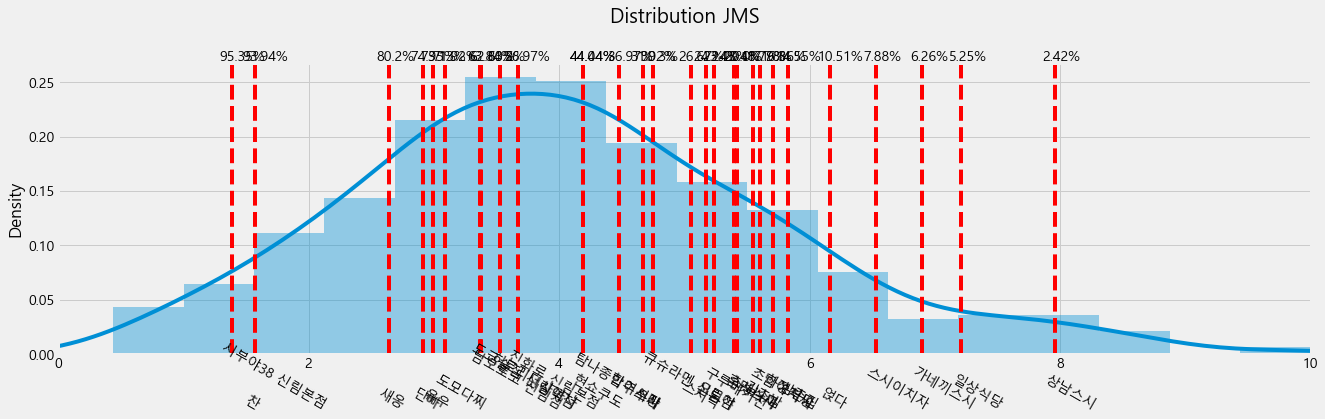

In [218]:
dist_jms()
for jp in df_jp.name:
    add_res(jp)

+ 상위 음식점 중에 스시이치자는 방문해본 적이 있다.
    - 상당히 맛집! 주변에도 추천하는 맛집이다.
    - JMS가 어느정도는 맛집을 고르는데 역할을 할 수 있을 것 같다.

In [223]:
# df_jp.to_csv('./source/res_jp.csv', index=False)